In [ ]:
# library to convert .mat to np.array()
%pip install mat73

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [88]:
# Channel download
import mat73

data = mat73.loadmat('ChannelQriga_Freq_3kmh_Scena0_test_MIR_GIT_RAW_NR_3GPP_3D_UMa_NLOS_3p5GHz.mat')
data

{'Hfrq': [{'Chan': array([[[[ 5.06481096e-06-9.40017327e-07j,
              5.09476064e-06-8.53566612e-07j,
              5.12176014e-06-7.65819426e-07j, ...,
             -2.86291723e-06+2.89986696e-06j,
             -2.96314639e-06+2.80888060e-06j,
             -3.06103965e-06+2.71496351e-06j],
            [ 2.45337931e-06-3.91918988e-06j,
              2.54131129e-06-3.90140754e-06j,
              2.62829626e-06-3.88081635e-06j, ...,
              1.38070988e-06+3.53410468e-06j,
              1.26879684e-06+3.56202152e-06j,
              1.15612380e-06+3.58685972e-06j],
            [-6.91033079e-07-3.12689600e-06j,
             -6.33523564e-07-3.17165236e-06j,
             -5.75294857e-07-3.21440926e-06j, ...,
              2.85144336e-06+3.40694826e-07j,
              2.82441837e-06+4.04336478e-07j,
              2.79583305e-06+4.67009571e-07j],
            ...,
            [-4.45127549e-06+1.89240044e-07j,
             -4.45438583e-06+9.28039471e-08j,
             -4.45538836e-06-

In [89]:
import numpy as np

H_initial = data['Hfrq'][0]['Chan']
H_dl = H_initial.transpose(1, 0, 2, 3)[:12, :, 0:600:12, :10] / np.abs(H_initial.max())
H_dl.shape


(12, 4, 50, 50)

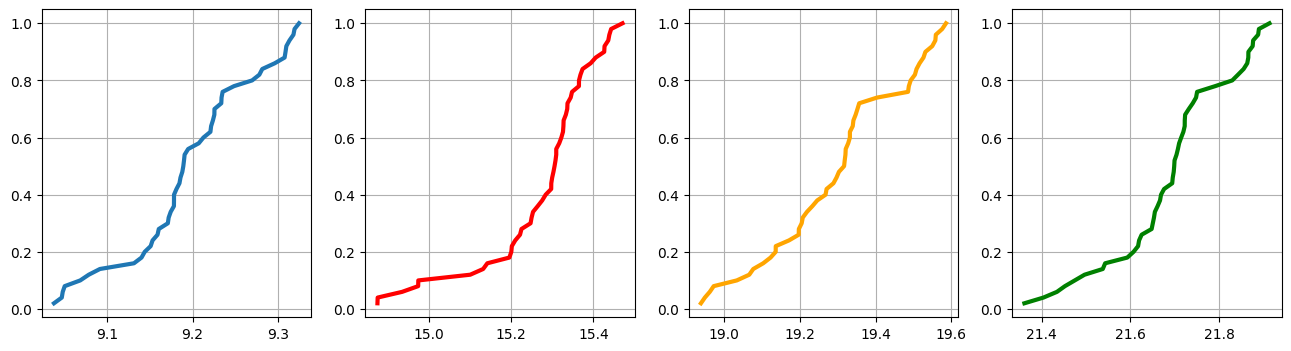

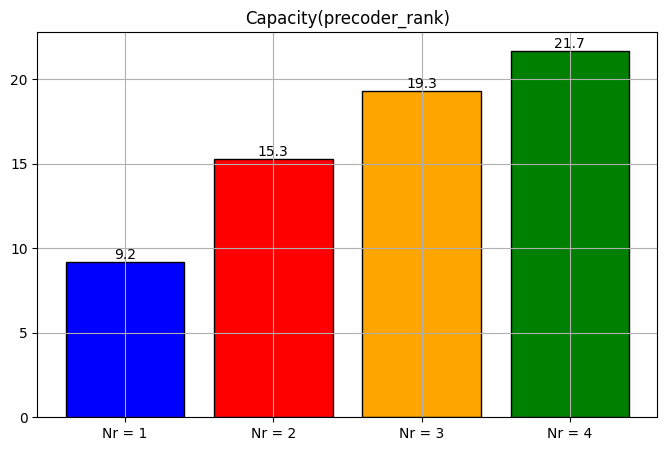

In [90]:
# Capacity of initial Channel
from extr_func import get_Capacity, cdf
import matplotlib.pyplot as plt


SNR = 30
channel_shape = list(H_dl.shape) + [1]

fig, axs = plt.subplots(1, 4, figsize=(16, 4))  # 1 строка, 4 столбца

Nr = 1  # precoder rank
Capacity1 = get_Capacity(H_dl, H_dl, Nr, SNR, channel_shape)
sort_capacity1, Capacity_ideal_distr1 = cdf(Capacity1)
axs[0].plot(sort_capacity1, Capacity_ideal_distr1, lw=3)
axs[0].grid()

Nr = 2  # precoder rank
Capacity2 = get_Capacity(H_dl, H_dl, Nr, SNR, channel_shape)
sort_capacity2, Capacity_ideal_distr2 = cdf(Capacity2)
axs[1].plot(sort_capacity2, Capacity_ideal_distr2, 'r', lw=3)
axs[1].grid()

Nr = 3  # precoder rank
Capacity3 = get_Capacity(H_dl, H_dl, Nr, SNR, channel_shape)
sort_capacity3, Capacity_ideal_distr3 = cdf(Capacity3)
axs[2].plot(sort_capacity3, Capacity_ideal_distr3, 'orange', lw=3)
axs[2].grid()

Nr = 4  # precoder rank
Capacity4 = get_Capacity(H_dl, H_dl, Nr, SNR, channel_shape)
sort_capacity4, Capacity_ideal_distr4 = cdf(Capacity4)
axs[3].plot(sort_capacity4, Capacity_ideal_distr4, 'g', lw=3)
axs[3].grid()


Capacity1_mean = float(np.mean(Capacity1))
Capacity2_mean = float(np.mean(Capacity2))
Capacity3_mean = float(np.mean(Capacity3))
Capacity4_mean = float(np.mean(Capacity4))

categories = ['Nr = 1', 'Nr = 2', 'Nr = 3', 'Nr = 4']
values = [Capacity1_mean, Capacity2_mean, Capacity3_mean, Capacity4_mean]

plt.figure(figsize=(8, 5))
named_colors = ['b', 'r', 'orange', 'g']
bars = plt.bar(categories, values, color=named_colors, edgecolor='black')
plt.grid()

# Добавляем значения над столбцами
plt.title('Capacity(precoder_rank)')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',  # Форматирование до 1 знака после запятой
             ha='center', va='bottom')

In [ ]:
# tensorly CPD_ALS , my CPD_ALS and CPD_ALS_QR and CPD_Gradient compare (also test on images)
from tensorly.decomposition import parafac
from tensorly.cp_tensor import cp_to_tensor

RankCP = 5
weights, factors = parafac(H_dl, rank=RankCP, n_iter_max=100, tol=1e-6, verbose=True)

In [ ]:
# My method compression: Tensorization + CPD_ALS on MIMO channel


In [ ]:
# Tucker decomposition my version and tensorly comparison


In [ ]:
# Tensor train realization


In [ ]:
# AutoRank